算法  

策略（损失函数） 

优化（损失函数最小化）


生成模型与判别模型：

生成模型：有先验概率（朴素贝叶斯、隐马尔可夫）


**sklearn官方给出的模型选择路径：**
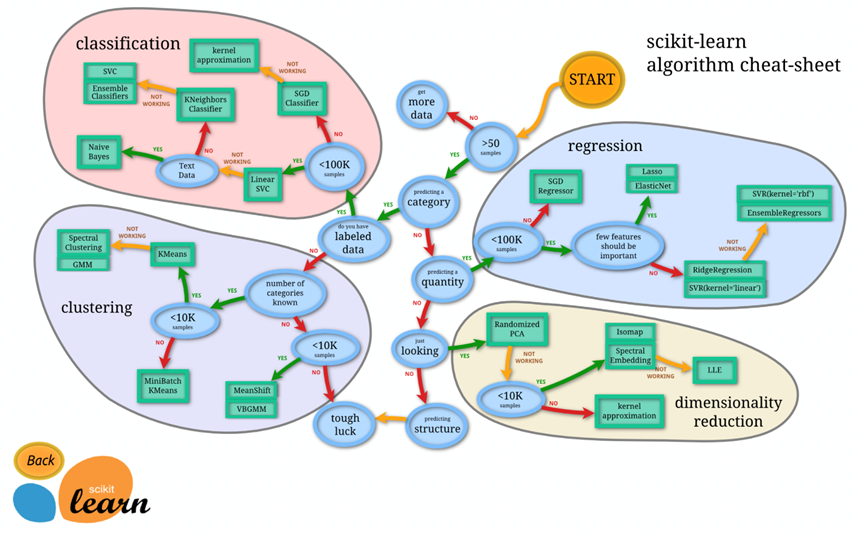

## 线性回归

试图学得一个线性模型以尽可能准确地预测实值输出标记。

### 一、线性关系

二维： 直线

三维： 平面

n维： 超平面

### 二、 线性模型

试图学得一个通过属性的线性组合来进行预测的函数。

**1. 基本形式：**

$$ f(x) = w^Tx+b $$

**2. 目标**

线性回归试图学得

$$f(x_i) = w^T x_i+b，使得f(x_i) \approx y_i $$

**3. 均方误差最小时**的$w,b$为求得的模型参数$w^*,b^*$

$$ 
\begin{align}
(w^*,b^*) & = arg min \sum_{i=1}^m (f(x_i)-y_i)^2 \\
& = arg min \sum_{i=1}^m (wx_i+b-y_i)^2
\end{align}
$$

4.基于**均方误差最小化**来进行模型求解的方法称为<span class="mark">**最小二乘法**</span>。

**5. 损失函数：**

$ \sum_{i=1}^m (f(x_i)-y_i)^2 $



6.最小二乘法求解参数时有两种方法： 

- **正规方程法**
$$ 𝑤^* = (𝑋^𝑇 𝑋)^{−1} 𝑋^𝑇 𝑦 $$
$$ 𝑋为特征值矩阵，𝑦为目标值矩阵 $$

    - 当特征过于复杂，求解速度太慢,对于复杂的算法，不能使用正规方程求解(逻辑回归等)


- **梯度下降**

    - 面对训练数据规模十分庞大的任务

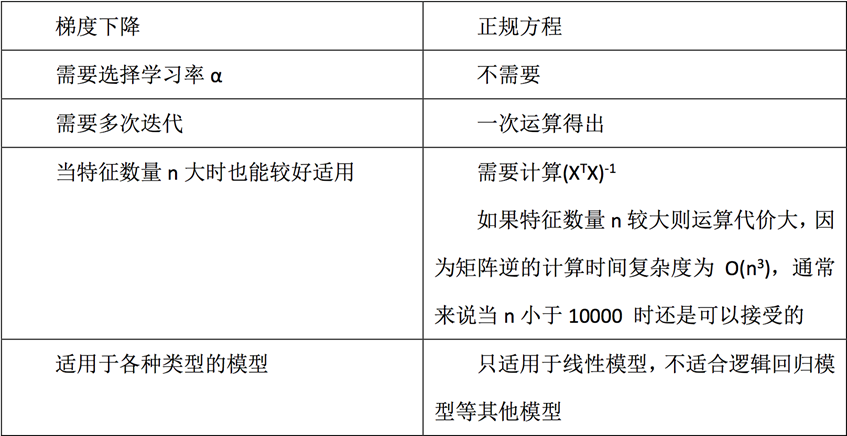

### 三、API调用

#### 1. `sklearn.linear_model.LinearRegression`  正规方程


#### 2. `sklearn.linear_model.SGDRegressor`  梯度下降


### 四、 案例：波士顿房价预测

In [46]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#### 获取数据

In [29]:
bs = load_boston()
print(bs.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
# 特征值
# bs.data
# 目标值
# bs.target

#### 数据分割

In [31]:
# 训练集与测试集分割
x_train, x_test, y_train, y_test = train_test_split(bs.data, bs.target, test_size=0.25)

#### 数据标准化处理

In [32]:
# 特征值和目标值是都必须进行标准化处理, 实例化两个标准化API
std_x = StandardScaler()

x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

# 目标值
std_y = StandardScaler()

y_train = std_y.fit_transform(y_train.reshape(-1,1))
y_test = std_y.transform(y_test.reshape(-1,1))

#### 正规方程求解

In [33]:
# 模型训练
lr =  LinearRegression()
lr.fit(x_train,y_train)

# 回归系数
print(lr.coef_)

[[-0.0993092   0.09943623 -0.02853498  0.09080225 -0.20599194  0.31429973
  -0.04557178 -0.33741496  0.32346071 -0.30056096 -0.21148342  0.09027734
  -0.34572135]]


In [35]:
# 预测测试集的房子价格
y_lr_predict = std_y.inverse_transform(lr.predict(x_test)) # 目标值进行了标准化，需要inverse_transform()以获取标准化之前的值
print(y_lr_predict[:5])

[[17.61772527]
 [21.53930408]
 [ 2.46595924]
 [24.61228693]
 [14.7761529 ]]


In [37]:
# 均方误差
print(mean_squared_error(std_y.inverse_transform(y_test), y_lr_predict))

31.372387881255097


#### 梯度下降求解

In [43]:
# 模型训练
sgd = SGDRegressor()
sgd.fit(x_train, y_train.ravel())

# 回归系数
print(sgd.coef_)

[-0.07930458  0.06106534 -0.07286489  0.09251624 -0.16347237  0.33530057
 -0.04827981 -0.28726647  0.14162034 -0.11734781 -0.20304271  0.09032336
 -0.33962122]


In [44]:
# 预测
y_sgd_predict = std_y.inverse_transform(sgd.predict(x_test)) # 目标值进行了标准化，需要inverse_transform()以获取标准化之前的值
print(y_sgd_predict[:5])

[17.13044807 22.02380612  5.16049224 24.82480366 15.46677755]


In [45]:
# 均方误差
print(mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

31.730631888596616


#### 岭回归

In [50]:
# 模型训练
ridge = Ridge(alpha=2.0)
ridge.fit(x_train, y_train)

# 回归系数
print(ridge.coef_)

[[-0.09700186  0.09456656 -0.03454545  0.09144402 -0.20028604  0.3162256
  -0.04594222 -0.3299106   0.29710173 -0.2746724  -0.20967899  0.08996412
  -0.34312722]]


In [51]:
# 预测
y_rd_predict = std_y.inverse_transform(ridge.predict(x_test)) # 目标值进行了标准化，需要inverse_transform()以获取标准化之前的值
print(y_rd_predict[:5])

[[17.5562963 ]
 [21.63215503]
 [ 2.90897217]
 [24.63878731]
 [14.89429754]]


In [52]:
# 均方误差
print(mean_squared_error(std_y.inverse_transform(y_test), y_rd_predict))

31.397314377113236


### 五、 回归性能评估

- <span class="mark">**均方误差MSE**</span>
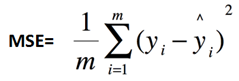

- **绝对平均误差MAE**
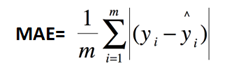

- **RMSE**
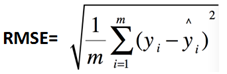

- <span class="mark">**$R^2$**</span>
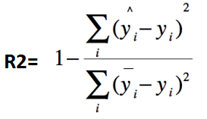

- **ev:explained_variance**
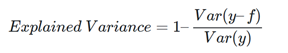

#### API

**`sklearn.metrics.mean_squared_error`**

**`sklearn.metrics.r2_score`**


sklearn.metrics官方文档

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### 六、 过拟合与欠拟合


**过拟合：**一个假设<font color='red'>在训练数据上能够获得比其他假设更好的拟合</font>， 但是<font color='red'>在训练数据外的数据集上却不能很好地拟合数据</font>，此时认为这个假设出现了过拟合的现象。(模型过于复杂)

**欠拟合：**一个假设<font color='red'>在训练数据上不能获得更好的拟合</font>， 在训练数据外的数据集上也不能很好地拟合数据，此时认为这个假设出现了欠拟合的现象。(模型过于简单)

#### 1. 过拟合

- 原因：
    原始特征过多，存在一些嘈杂特征，模型过于复杂是因为模型尝试去兼顾各个测试数据点


- 解决办法：

    - 进行特征选择，消除关联性大的特征(很难做)
    
    - 交叉验证(让所有数据都有过训练)
    
    - 正则化

#### 2. 正则化

- L1

- L2

    - 作用：可以使得W的每个元素都很小，都接近于0
    
    - 优点：越小的参数说明模型越简单，越简单的模型则越不容易产生过拟合现象

## 带有正则化的线性回归-岭回归 Ridge

### 1. API调用

#### `sklearn.linear_model.Ridge`

sklearn.linear_model.Ridge(alpha=1.0)

具有l2正则化的线性最小二乘法

alpha:正则化力度，alpha越大，w越小

### 2. 线性回归与岭回归对比

岭回归：回归得到的回归系数更符合实际，更可靠。另外，能让<font color='red'>估计参数的波动范围变小</font>，变的更稳定。在存在病态数据偏多的研究中有较大的实用价值。